In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Алгоритмы оптимизации
import torch.optim

In [16]:
def show_contours(objective, 
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(5,5))
    plt.contour(X, Y, res, 100)

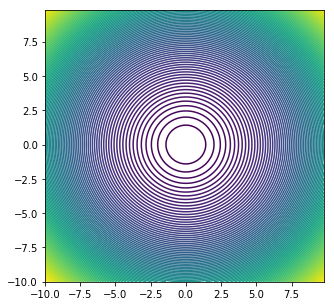

In [17]:
# Функция, которую нужно оптимизировать
def objective(inp):
    return (inp * inp).sum()

show_contours(objective)

In [18]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-35 *
       [[ 8.0224],
        [ 8.0224]]) <- result


(2, 4000)


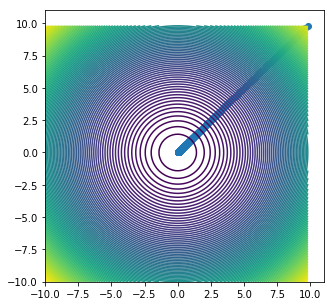

In [19]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

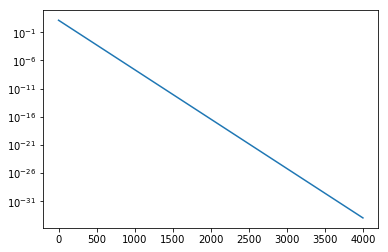

In [20]:
target = np.array([[0, 0]]).T
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plt.semilogy(error_hist);

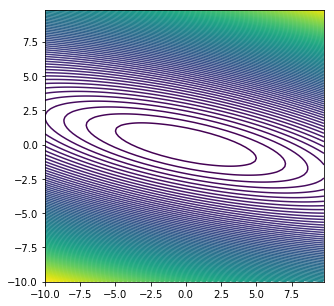

In [21]:
# Функция, которую нужно оптимизировать
def objective2(inp):
#     print(inp.transpose(0, 1).shape)
    gramma = np.array([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0) @ (gramma @ inp)).sum()
    return res

show_contours(objective2)

In [22]:
# Функция, которую нужно оптимизировать
def objective(inp):
    gramma = torch.tensor([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0).mm(gramma.mm(inp))).sum()
    return res

# Задача 1
Решить задачу оптимизации objective, указанного выше несколькими различными способами: 

1) SGD 

2) SGD с моментом

3) Adam

4) RProp

Какой метод обеспечивает быстрейшее схождение к решению? Обсудить результат (делать графики сходимости).

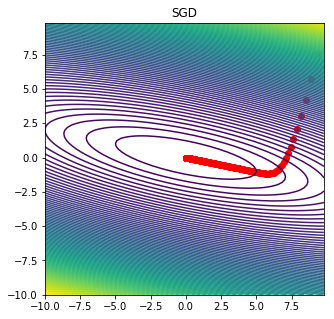

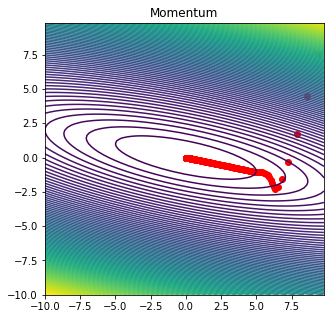

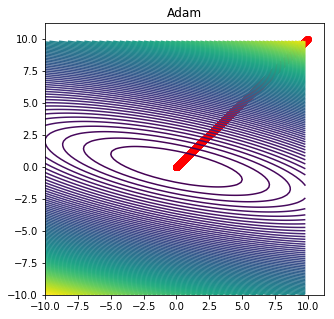

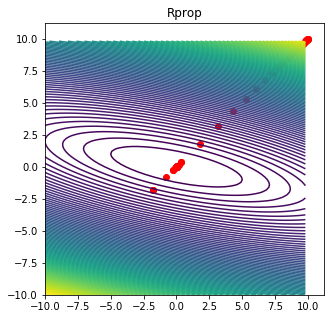

In [25]:
list_opt = ['SGD', 'Momentum', 'Adam', 'Rprop']
def create_optimizer(index, learning_rate = 0.01):
    x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
    x.requires_grad = True
    if index == 0:
        optimizer = torch.optim.SGD([x], lr=learning_rate) 
    elif index == 1:
        optimizer = torch.optim.SGD([x], lr=learning_rate, momentum=0.5) 
    elif index == 2:
        optimizer = torch.optim.Adam([x], lr=learning_rate) 
    else:
        optimizer = torch.optim.Rprop([x], lr=learning_rate) 
    return (x , optimizer)

def optimize(x, optimizer):
    history = []
    for step_index in range(4000):
        obj_var = objective(x)
        optimizer.zero_grad()
        obj_var.backward()
        optimizer.step() 
        history.append(x.data.clone().numpy())
    return history
for i in range(4):
    x, o = create_optimizer(i)
    history = optimize(x, o)
    history_arr = np.concatenate(history, axis=1)
    
    show_contours(objective2)
    plt.title(list_opt[i])
    plt.scatter(history_arr[0, :], history_arr[1, :], c='red')

# Задача 2
Решить задачу оптимизации невыпуклой функции $f(x) = 10\sin x \sin y  + x^2 + y^2$, стартуя из точки $x_0 = 10.0, y_0 = 10.0$ всеми подходами, указанными выше.
Какой из методов решает задачу лучше всего и быстрее? Зависит ли решение от начального приближения? Обсудить, почему.

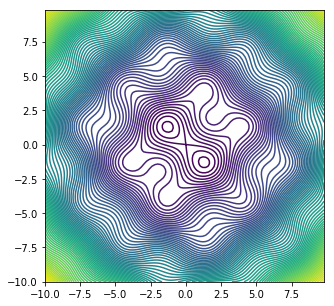

In [29]:
def objective(inp):
    return 10 * torch.sin(inp[0]) * torch.sin(inp[1]) + inp[0] ** 2 + inp[1] **2
def objective2(inp):
    return (10 * np.sin(inp[0]) * np.sin(inp[1]) + inp[0] **2 + inp[1]**2)[0]
show_contours(objective2)

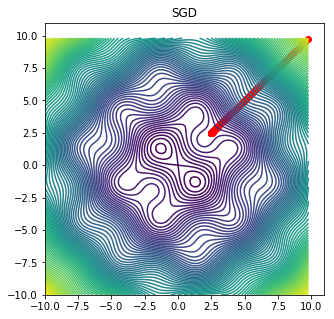

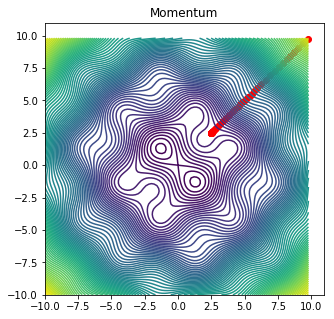

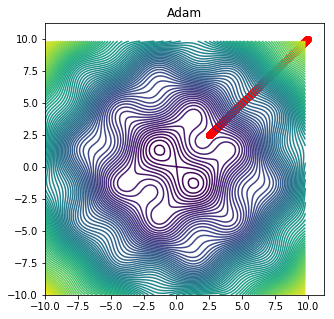

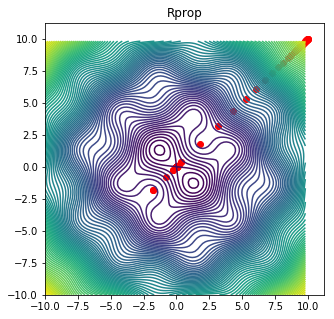

In [30]:
for i in range(4):
    x, o = create_optimizer(i)
    history = optimize(x, o)
    history_arr = np.concatenate(history, axis=1)
    
    show_contours(objective2)
    plt.title(list_opt[i])
    plt.scatter(history_arr[0, :], history_arr[1, :], c='red')